# Construction Management Supervise

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [20]:
df_raw= pd.read_csv('TRAIN.txt',sep=',')

In [21]:
df_raw.head()

,Unnamed: 0,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,0,180.410508,586.869214,44,1,0,0,0,1
1,1,122.405353,759.672381,44,1,0,0,0,1
2,2,52.059159,577.329843,13,1,0,0,0,0
3,3,157.164940,445.906501,45,1,0,0,0,1
4,4,214.588272,542.401146,15,1,0,0,0,0


In [22]:
df=df_raw.copy()

In [23]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
df.head()

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
0,180.410508,586.869214,44,1,0,0,0,1
1,122.405353,759.672381,44,1,0,0,0,1
2,52.059159,577.329843,13,1,0,0,0,0
3,157.164940,445.906501,45,1,0,0,0,1
4,214.588272,542.401146,15,1,0,0,0,0


## Data Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   built_area      3530 non-null   float64
 1   modul_price     3530 non-null   float64
 2   weeks_duration  3530 non-null   int64  
 3   DETACHED        3530 non-null   int64  
 4   COLLECTIVE      3530 non-null   int64  
 5   COMMERCIAL      3530 non-null   int64  
 6   OTHERS          3530 non-null   int64  
 7   DELAYED         3530 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 220.8 KB


In [26]:
df.isna().sum()

built_area        0
modul_price       0
weeks_duration    0
DETACHED          0
COLLECTIVE        0
COMMERCIAL        0
OTHERS            0
DELAYED           0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
built_area,3530.0,8514.937177,5881.154888,50.389489,3786.373896,8280.485314,12466.211543,28463.142073
modul_price,3530.0,730.406773,247.035205,184.518878,563.545790,701.690692,872.719814,1962.359114
weeks_duration,3530.0,54.016431,20.411681,13.000000,38.000000,52.000000,69.750000,124.000000
DETACHED,3530.0,0.116431,0.320786,0.000000,0.000000,0.000000,0.000000,1.000000
COLLECTIVE,3530.0,0.365156,0.481542,0.000000,0.000000,0.000000,1.000000,1.000000
COMMERCIAL,3530.0,0.384703,0.486594,0.000000,0.000000,0.000000,1.000000,1.000000
OTHERS,3530.0,0.133711,0.340390,0.000000,0.000000,0.000000,0.000000,1.000000
DELAYED,3530.0,0.580737,0.493508,0.000000,0.000000,1.000000,1.000000,1.000000


## EDA

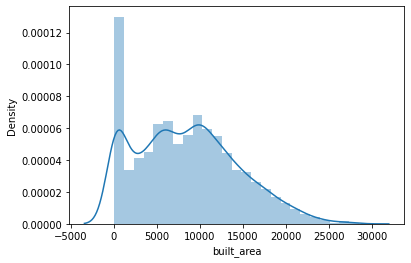

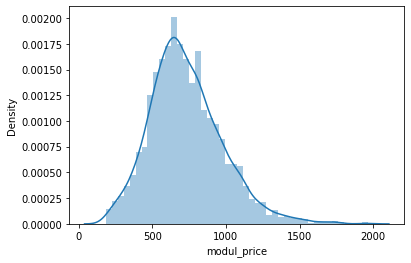

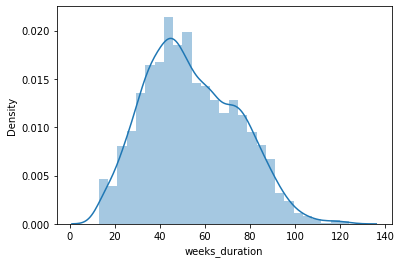

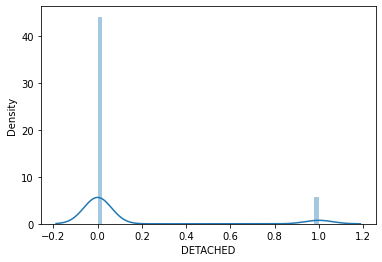

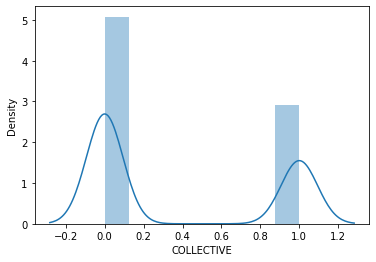

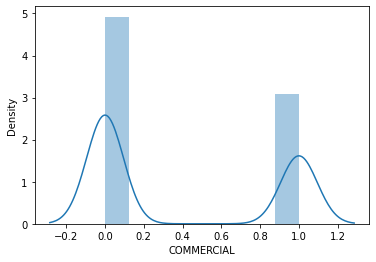

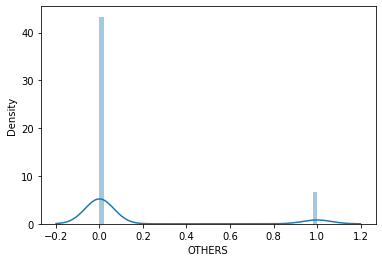

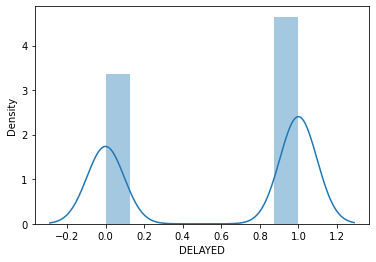

In [28]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [29]:
df.shape

(3530, 8)

In [30]:
from scipy import stats

In [31]:
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [32]:
df.shape

(3478, 8)

<AxesSubplot:xlabel='DELAYED', ylabel='count'>

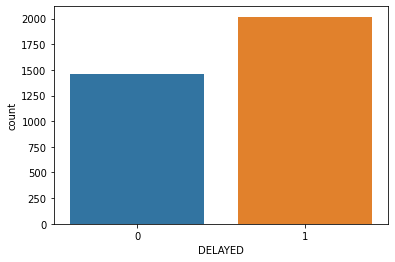

In [36]:
sns.countplot(df['DELAYED'])

## Split Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=df.drop('DELAYED',axis=1)
y=df['DELAYED']

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

## Standard Scalar 

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
Sc=StandardScaler()

In [40]:
X_train=Sc.fit_transform(X_train)
X_test=Sc.transform(X_test)

## Model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [41]:
M1=LogisticRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P1))
print('\n')
print('classification_report')
print(classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P1))

confusion_matrix
[[135 298]
 [107 504]]


classification_report
              precision    recall  f1-score   support

           0       0.56      0.31      0.40       433
           1       0.63      0.82      0.71       611

    accuracy                           0.61      1044
   macro avg       0.59      0.57      0.56      1044
weighted avg       0.60      0.61      0.58      1044



Accuracy: 61.206896551724135


ROC Value: 0.5683277707011185


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P2))
print('\n')
print('classification_report')
print(classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P2))

confusion_matrix
[[207 226]
 [237 374]]


classification_report
              precision    recall  f1-score   support

           0       0.47      0.48      0.47       433
           1       0.62      0.61      0.62       611

    accuracy                           0.56      1044
   macro avg       0.54      0.55      0.54      1044
weighted avg       0.56      0.56      0.56      1044



Accuracy: 55.651340996168585


ROC Value: 0.5450856695758666


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
M3=RandomForestClassifier()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P3))
print('\n')
print('classification_report')
print(classification_report(y_test,P3))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P3))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P3))

confusion_matrix
[[193 240]
 [201 410]]


classification_report
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       433
           1       0.63      0.67      0.65       611

    accuracy                           0.58      1044
   macro avg       0.56      0.56      0.56      1044
weighted avg       0.57      0.58      0.57      1044



Accuracy: 57.758620689655174


ROC Value: 0.5583792896209976


In [46]:
from sklearn.svm import SVC

In [47]:
M4=SVC()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P4))
print('\n')
print('classification_report')
print(classification_report(y_test,P4))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P4))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P4))

confusion_matrix
[[109 324]
 [ 78 533]]


classification_report
              precision    recall  f1-score   support

           0       0.58      0.25      0.35       433
           1       0.62      0.87      0.73       611

    accuracy                           0.61      1044
   macro avg       0.60      0.56      0.54      1044
weighted avg       0.61      0.61      0.57      1044



Accuracy: 61.49425287356321


ROC Value: 0.5620362635742715


In [48]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

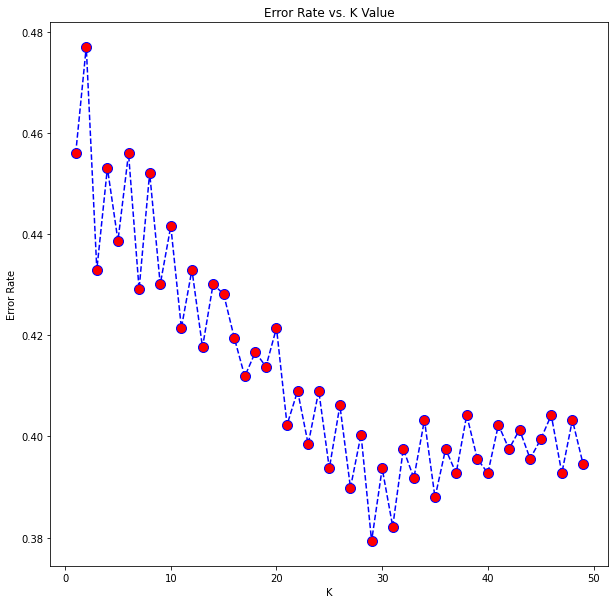

In [49]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
M5=KNeighborsClassifier(n_neighbors=29)
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P5))
print('\n')
print('classification_report')
print(classification_report(y_test,P5))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P5))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P5))

confusion_matrix
[[180 253]
 [143 468]]


classification_report
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       433
           1       0.65      0.77      0.70       611

    accuracy                           0.62      1044
   macro avg       0.60      0.59      0.59      1044
weighted avg       0.61      0.62      0.61      1044



Accuracy: 62.06896551724138


ROC Value: 0.5908309173996363
